In [2]:
import matplotlib.pyplot as plt
from glob import glob
import h5py, os, copy
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy.stats.stats import pearsonr
import pysptools.eea as eea #endmembers extraction algorithms
import pysptools.abundance_maps as amap
import pandas as pd
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
from earthpy.spatial import bytescale
import sys

from neon_helper_functions import *


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Import Tiles

In [3]:
# Import hyp data into dict with tile number as key
ONAQ_hyp_refl=glob(os.path.join('data','NEON','*ONAQ*','*DP3*'))

# File import is scalable if multiple tiles are available
ONAQ_data={}
for file in ONAQ_hyp_refl:
    data,metadata=read_neon_reflh5(file)
    data_clean,metadata_clean = clean_neon_refl_data(
    data,metadata)
    print('Tile Key:',os.path.basename(file)[18:32])
    ONAQ_data[os.path.basename(file)[18:32]]={
        'reflectance':data_clean,
        'metadata':metadata_clean}
print('Raw Data Dimensions:',data.shape)
print('Cleaned Data Dimensions:',data_clean.shape)

Tile Key: 374000_4449000
Tile Key: 378000_4452000
Raw Data Dimensions: (1000, 1000, 426)
Cleaned Data Dimensions: (1000, 1000, 360)


# Sensitivity Analysis for Tile 374000_4449000

In [5]:
ee = eea.NFINDR()
endmember_sensitivity_analysis=[]
for i in range(4,12):
     endmember_sensitivity_analysis.append(ee.extract(ONAQ_data['374000_4449000']['reflectance'],i,maxit=i+1,
               normalize=False,ATGP_init=True))

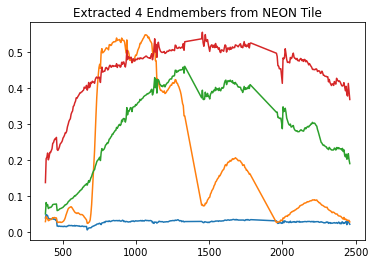

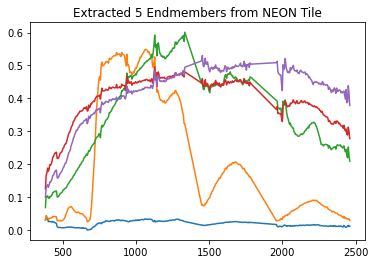

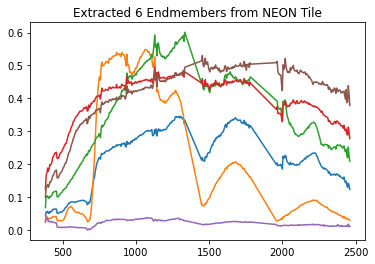

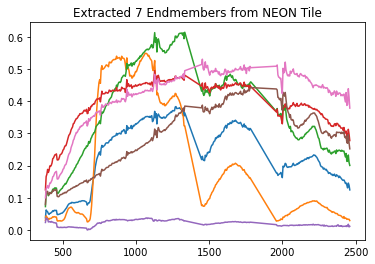

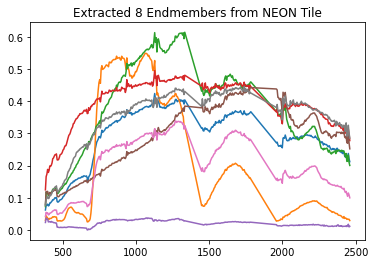

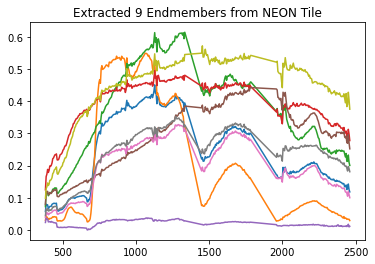

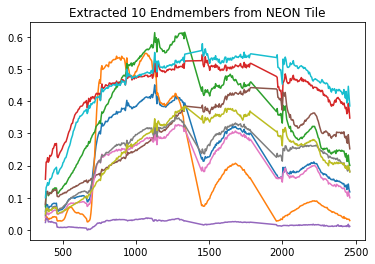

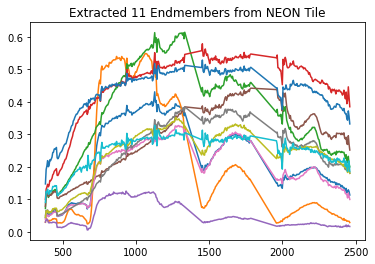

In [6]:
# fig,ax=plt.subplots()
for em in endmember_sensitivity_analysis:
    fig,ax=plt.subplots()
    for refl in em:
        plt.title(f'Extracted {len(em)} Endmembers from NEON Tile')
        ax.plot(ONAQ_data['374000_4449000']['metadata']['wavelength'],refl)
        

# Sensitivity Analysis for Tile 378000_4452000

In [7]:
ee = eea.NFINDR()
endmember_sensitivity_analysis_2=[]
for i in range(4,12):
     endmember_sensitivity_analysis_2.append(ee.extract(ONAQ_data['378000_4452000']['reflectance'],i,maxit=i+1,
               normalize=False,ATGP_init=True))

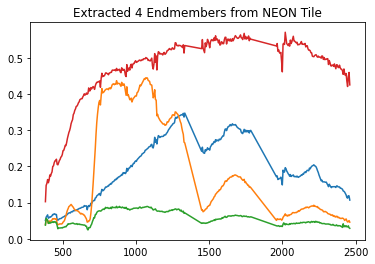

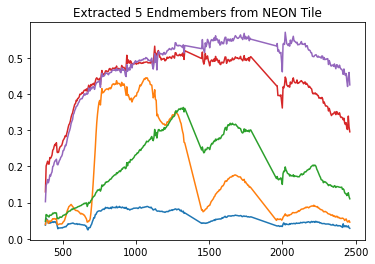

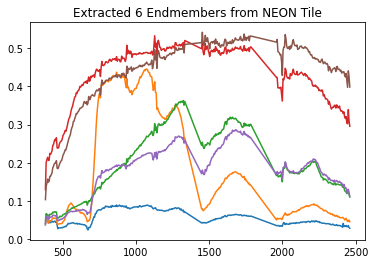

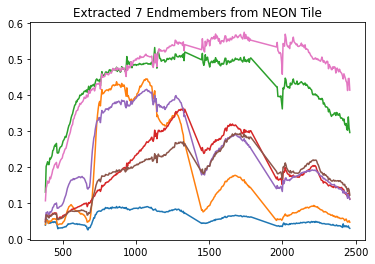

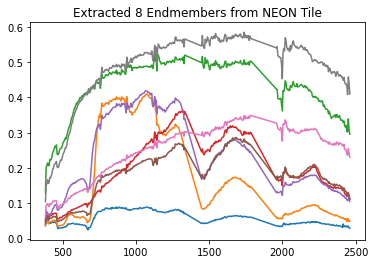

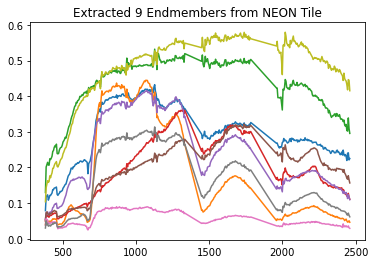

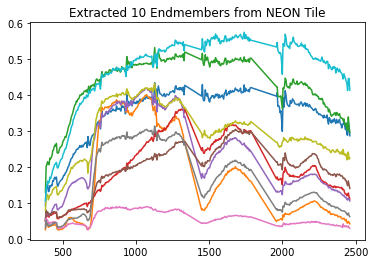

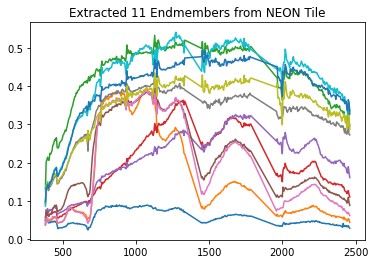

In [8]:
# fig,ax=plt.subplots()
for em in endmember_sensitivity_analysis_2:
    fig,ax=plt.subplots()
    for refl in em:
        plt.title(f'Extracted {len(em)} Endmembers from NEON Tile')
        ax.plot(ONAQ_data['378000_4452000']['metadata']['wavelength'],refl)
        

# Results
The endmembers from the second tile are less cluttered and more signatures resembling vegetation are present at higher iterations, whereas increased endmembers for the first tile appear to be extracting more signatures resembling soil curves. Curve redundancy appears to increase after seven endmember extraction, so abundance maps will move forward with seven endmembers.